<a href="https://colab.research.google.com/github/unachankz/goto_data_science/blob/master/notebook/copy_paste_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Copy-Paste is a Strong Data Augmentation Method for Instance Segmentation

下記サイトにあるcopy-paste-augのコードを利用して画像を水増しした。

[Copy-Paste](https://github.com/conradry/copy-paste-aug)


In [140]:
!git clone https://github.com/conradry/copy-paste-aug

Cloning into 'copy-paste-aug'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 47 (delta 21), reused 35 (delta 13), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [141]:
%cd copy-paste-aug


/content/copy-paste-aug/cocodata/copy-paste-aug


In [142]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
import cv2
import numpy as np
from copy_paste import CopyPaste
from coco import CocoDetectionCP
from visualize import display_instances
import albumentations as A
import random
from matplotlib import pyplot as plt

下記モジュールをimportする際にエラーが発生していたため、
albumentationsのバージョンを変更してインストールする。



```
from albumentations.pytorch.transforms import ToTensorV2

#エラー内容
ImportError: cannot import name 'ToTensorV2' from 'albumentations.pytorch.transforms' (/usr/local/lib/python3.7/dist-packages/albumentations/pytorch/transforms.py)

```

* 参考URL
[Can't import ToTensorV2 in Colab](https://stackoverflow.com/questions/62872413/cant-import-totensorv2-in-colab)




In [144]:
! pip install albumentations==0.4.6

In [145]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from copy_paste import CopyPaste

transform = A.Compose([
      A.RandomScale(scale_limit=(-0.9, 1), p=1), #LargeScaleJitter from scale of 0.1 to 2
      A.PadIfNeeded(256, 256, border_mode=0), #constant 0 border
      A.RandomCrop(256, 256),
      A.HorizontalFlip(p=0.5),
      CopyPaste(blend=True, sigma=1, pct_objects_paste=0.5, p=1)
    ], bbox_params=A.BboxParams(format="coco")
)

In [146]:
!mkdir cocodata


In [147]:
%cd /content/copy-paste-aug/cocodata

/content/copy-paste-aug/cocodata


In [ ]:
!unzip coco.zip

In [153]:

transform = A.Compose([
      # A.RandomScale(scale_limit=(-0.9, 1), p=1), #LargeScaleJitter from scale of 0.1 to 2
      # A.PadIfNeeded(256, 256, border_mode=0), #constant 0 border
      # A.RandomCrop(256, 256),
      # A.HorizontalFlip(p=0.5),
      CopyPaste(blend=True, sigma=1, pct_objects_paste=1, p=1)
    ], bbox_params=A.BboxParams(format="coco")
)


data = CocoDetectionCP(
    '/content/copy-paste-aug/cocodata/coco/images/', 
    '/content/copy-paste-aug/cocodata/coco/annotations.json', 
    transform
)


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12472 missing from current font.
  font.set_text(s, 0, flags=flags)


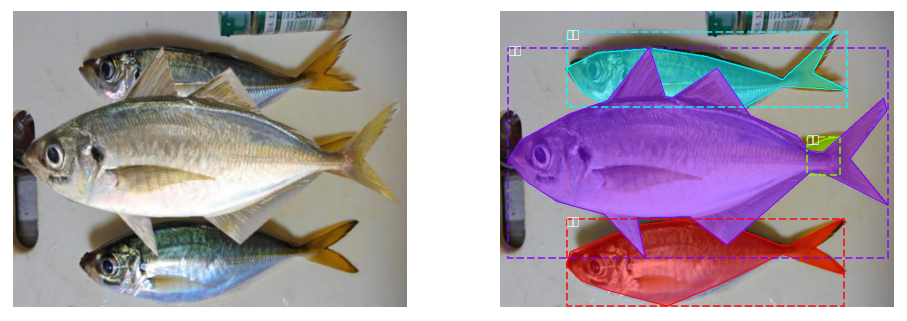

In [161]:
f, ax = plt.subplots(1, 2, figsize=(16, 16))

index = random.randint(0, len(data))
# index=0
img_data = data[index]
image = img_data['image']
masks = img_data['masks']
bboxes = img_data['bboxes']

empty = np.array([])
display_instances(image, empty, empty, empty, empty, show_mask=False, show_bbox=False, ax=ax[0])

if len(bboxes) > 0:

    boxes = np.stack([b[:4] for b in bboxes], axis=0)
    box_classes = np.array([b[-2] for b in bboxes])
    mask_indices = np.array([b[-1] for b in bboxes])
    show_masks = np.stack(masks, axis=-1)[..., mask_indices]
    class_names = {k: data.coco.cats[k]['name'] for k in data.coco.cats.keys()}
    display_instances(image, boxes, show_masks, box_classes, class_names, show_bbox=True, ax=ax[1])
else:
    display_instances(image, empty, empty, empty, empty, show_mask=False, show_bbox=False, ax=ax[1])